# Scipy¶

선형대수 기본 연산

scipy는 거의 항상 numpy와 같이 사용된다.<br>
선형대수 연산을 지원하는 scipy.linalg 모듈을 불러온다

In [1]:

import numpy as np
from scipy.linalg import * 

행렬은 np.array()함수를 활용한다.

In [2]:
arr = np.array([[1, 2],[3, 4]])
arr


array([[1, 2],
       [3, 4]])

행렬식의 계산은 det() 함수를 활용한다.

In [3]:
det(arr)

-2.0

역행렬은 inv()함수를 활용한다.

In [4]:
iarr = inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

행렬의 곱셈은 아래와 같이 작성한다
np.dot(A, B)

In [5]:
np.dot( arr, iarr )

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# 행렬로 연립방정식 풀이

아래의 연립방정식을 풀이한다.$$
3x + 2y = 2
$$$$
x - y = 4
$$$$
5y + z = -1
$$

In [7]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])      # 열벡터
x = solve(A, b)
x

array([ 2., -2.,  9.])

In [8]:
np.dot( A, x )

array([ 2.,  4., -1.])

# 비선형 방정식의 해 구하기

아래 방정식의 해를 구한다.$$
x = e^{-x}
$$

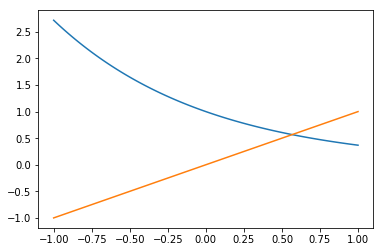

In [10]:

import matplotlib.pyplot as plt
%matplotlib inline 
x = np.linspace(-1,1,101)   
y = np.exp( -x )
plt.plot( x, y )
plt.plot( x, x )
plt.show()

그래프를 통해서 보면 위와 같다.<br>
0.5 근처에서 해가 존재함을 알 수 있다.<br>
비선형 방정식을 풀기 위하여 scipy.optimize 모듈을 불러온다<br>

In [11]:
from math import *                    # 일반적인 수학 함수를 사용하려면 필요하다.
from scipy.optimize import fsolve     # fsolve( ) 함수를 도입한다.

방정식을 f(x) = 0 형태로 하여 함수로 정의한다.

In [12]:
def f(x):
    return x - exp(-x)

In [13]:
fsolve( f, 0.5 )

array([0.56714329])

# 함수의 최소값

scipt.optimize모듈의 fmin_bfgz()함수로 최소값을 구한다.

In [15]:

from scipy.optimize import fmin_bfgs

아래 식의 최소값을 구한다.$$
f(x) = x^2 + 10sin(x)
$$
파이썬 함수로 정의한 후 함수의 형태를 그래프로 그려본다.

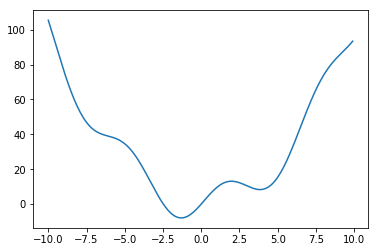

In [16]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

fmin_bfgs()함수의 인자로 최소화할 함수의 이름과 x의 시작점을 넘겨준다.

In [18]:
fmin_bfgs( f, 0 )

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

fmin_bfgs() 함수는 국부 최소점을 찾는 기능만 있으므로, 초기값에 따라 결과가 달라질 수 있다.
x=3을 시작점으로 하면 아래와 같다.

# 수치 적분

scipy.integrate 모듈의 quad() 함수를 이용하여 수치 적분을 계산한다.
아래 정적분을 계산한다.$$
\int_{0}^{1}x^2dx
$$

In [19]:
from scipy.integrate import quad
def f(x):
    return x*x
quad( f, 0, 1 )

(0.33333333333333337, 3.700743415417189e-15)

첫번째 반환값이 수치적분의 결과값<br>
두번째 반환값은 추정오차이다.<br>
피적분 함수를 numpy를 함수를 활용한 수학식으로 표현할 수 있다.<br>
exp(-x)를 0부터 무한대까지 적분하는 코드는 아래와 같다.<br>

In [20]:
def f(x):
    return np.exp(-x)
F, err = quad( f, 0, np.inf )
print(F)

1.0000000000000002


# 선형 회귀법: 최소제곱법¶

scipy.stats 모듈의 linregress(x, y)함수를 사용하여 회귀 직선의 기울기와 절편을 구할 수 있따.

In [21]:
import numpy as np
from scipy.stats import linregress

x = np.linspace(0, 4, 5)
y = [ 0, 2.1, 4.2, 5.9, 8.3 ] 
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("slope = %8.3f" % slope)
print("intercept = %8.3f" % intercept)

slope =    2.040
intercept =    0.020


회귀 직선과 데이터를 그려서 비교한다.

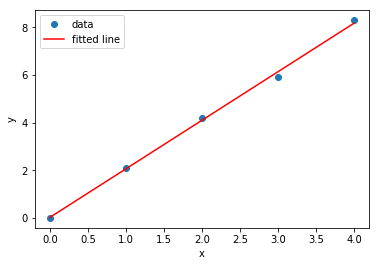

In [22]:
yfit = intercept + slope * x  

plt.plot(x, y, 'o', label='data')
plt.plot(x, yfit, 'r', label='fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 비선형 회귀법: Levenberg-Marquardt 알고리즘

아래 주어진 데이터를 비선형 회귀법으로 얻는 예제이다.

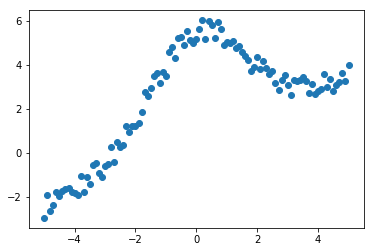

In [23]:
ndata = 101

x = np.linspace(-5,5,ndata)
y = 0.6*x + 5* np.exp(-0.2* x**2 ) + np.random.rand(ndata) 
plt.plot(x,y,'o')

Levenberg-Marquardt 알고리즘을 사용하여 최적의 곡선을 구한다.
scipy.optimize 모듈의 curve_fit()함수를 이용한다.
원하는 형태의 곡선에 대한 수식을 함수로 정의한다.
함수의 수식을 표현할 떄, numpy 함수를 사용한다.$$
y = a x + b e^{-c  x^2}
$$
위와 같이 가정하며, a, b, c는 비선형 회귀에 의해 결정될 값이다.

In [25]:
# non-linear least square method using Levenberg-Marquardt algorithm  
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x + b*np.exp(-c* x**2 )

변수의 초기값을 설정하고 curve_fit 함수를 호출한다.
첫번째로 반환되는 변수 popt가 최적화된 변수에 대한 리스트이다.

In [26]:
p0ini = [0, 0, 0]            # initial values of parameters for fitting function
popt, pcov = curve_fit( func, x, y, p0 = p0ini )      

print( popt )

[0.59648259 5.36721719 0.15113667]


구해진 변수로 최적화된 곡선을 예측하고, 원래의 데이터와 비교한다.

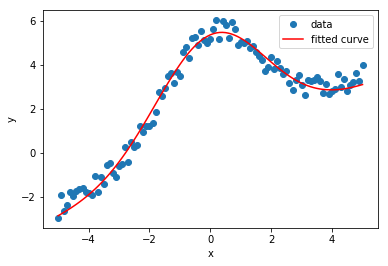

In [27]:
yfit = func( x, *popt )       # 매개변수를 함수의 인자 a, b, c 로 전달하여 계산한다.

plt.plot( x, y, 'o', label='data')
plt.plot( x, yfit, 'r', label='fitted curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 상미분 방정식: 초기값 문제

scipy.integrate 모듈의 solve_ivp() 함수를 이용하여 상미분방정식의 초기값문제에 대한 수치해를 얻을 수 있다.

In [29]:
from scipy.integrate import solve_ivp

아래와 같은 일계 상미분방정식의 수치해를 구하는 경우를 실습한다.$$
\frac{dy}{dt}=0.5y
$$
도함수를 함수 형식으로 정의한다.

In [31]:

def dydt(t, y) : 
    return -0.5 * y

초기값 y(0) = 1 에 대하여, t = 10까지 수치해를 구한다.

In [32]:
t0 = 0
tend = 10
y0 = 1

sol = solve_ivp( dydt, (t0, tend), (y0,), t_eval=np.linspace(t0,tend,21) )

초기값이 하나인 경우에도 입력 인자는 튜플이다.
인자 t_eval은 선택사항으로, 수치해가 계산될 t의 간격을 명시할 수 있다.
결과가 반환된 변수 sol에서 y와 방정식의 해 y는 아래와 같이 얻어진다.

In [33]:
sol.t

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [34]:
sol.y

array([[1.        , 0.77877121, 0.60652683, 0.47231798, 0.36766997,
        0.28642722, 0.22325718, 0.17381699, 0.13533366, 0.10546992,
        0.08217585, 0.06396748, 0.04982315, 0.03883629, 0.03024224,
        0.0235437 , 0.01834532, 0.01429687, 0.01113201, 0.00867035,
        0.0067547 ]])

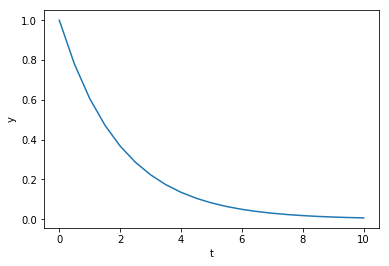

In [35]:
plt.plot( sol.t, sol.y[0] )
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# 이계 상미분방정식


아래 이계 미분방정식을 푸는 예제이다.$$
y''+2y'+2y=cos(2t)
$$$$
y(0) = 0
$$$$
y'(0) = 0
$$
이계 미분방정식은 연립 일계 미분방정식으로 변환할 수 있다.
아래와 같이 치환하도록 한다.$$
v(t) = y'(t)
$$
최종적으로 아래와 같이 바꿀 수 있다.$$
v' + 2v + 2y = cos(2)
$$$$y(0) = 0
$$$$v(0) = 0
$$

In [36]:
def dYdt( t, Y ) :                              # Y[0] = y(t), Y[1] = v(t)
    return  Y[1], -2*Y[1]-2*Y[0]+np.cos(2*t)    # y'(t), v'(t)

# 초기값
Y0 = ( 0, 0 )      # y(0)  v(0)

t0 = 0
tend = 10

sol = solve_ivp( dYdt, (t0, tend), Y0, t_eval=np.linspace(t0,tend,101) )

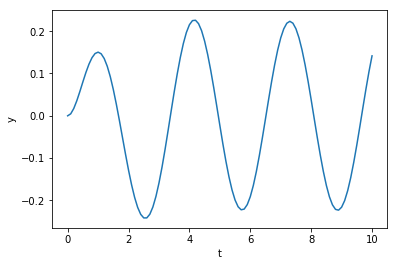

In [37]:
plt.plot( sol.t, sol.y[0] )
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# 과제

6번
파일 - 새 Python3 노트를 통해 새 노트북을 만드시오.
아래 작성된 코드 셀을 복사한 후 ## FIXME ## 부분을 수정하여 감쇠진동 상미분방정식의 그래프를 plot하시오.
감쇠진동 상미분방정식
$$
4x'' + 1x' + 4x = 0
$$$$
x(0) = 0
$$$$
x'(0) = 0
$$
위와 같을 떄 t = 0부터 t = 20까지의 위치를 그래프로 그리시오.

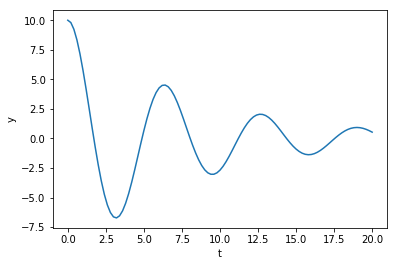

In [39]:
def dXdt( t, X ) : # X[0]= x(t) , X[1]=v(t)                              
    return  X[1], -X[0]-(X[1]/4) # x'(t),v'(t)

# 초기값
X0 = ( 10, 0 ) 

t0 = 0
tend = 20

sol = solve_ivp( dXdt, (t0, tend), X0, t_eval=np.linspace(t0,tend,101) )
plt.plot( sol.t, sol.y[0] )
plt.xlabel('t')
plt.ylabel('y')
plt.show()